In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import obspy as obs


Bad key "text.kerning_factor" on line 4 in
C:\Users\udiyo\AppData\Local\Continuum\miniconda3\envs\uni\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Read data

In [2]:
def read_data(filename):
    
    """
    Return data as numpy array
    
    Paramters:
    ----------
    filename: str
        Text file in the same folder as notebook
    """
    with open(filename, "r") as f:
        data_str = f.read()

    # remove newline characters
    data_str = data_str.replace("\n", "")

    # add space before negative values
    data_str = re.sub("(\d)(-)", r"\1 \2", data_str)

    # split values into a list
    data_list = data_str.split()

    # load data into numpy data array
    data = np.array(data_list, dtype=np.float32)
    
    return data

In [3]:
filename = "forFK.txt"
data = read_data(filename)

n_x = 200    # number of channels
dx = 50    # meter

n_t = 1000    # number of points in a channel
dt = 0.004    # sec

# reshape data into 2d array, so each row is a channel
data = data.reshape((n_x, n_t))

# load data into obspy object
traces = [obs.Trace(row, header={"delta":dt, "distance": dx*i}) for i, row in enumerate(data)]
st = obs.Stream(traces)

# Plot t-x

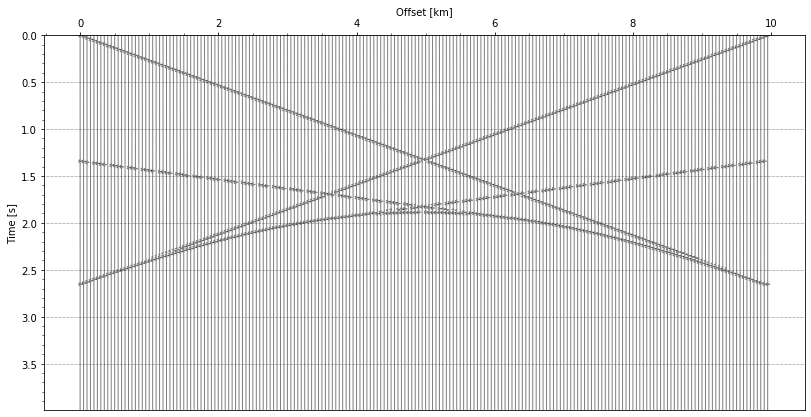

In [4]:
# create matploblib plot
fig = plt.figure(figsize=(12,6.67))
_ = st.plot(type="section", time_down=True, fig=fig)

# format plot
ax = fig.axes[0]
ax.xaxis.set_label_position("top") 
ax.xaxis.tick_top()

# Plot F-k

In [5]:
# perform 2d fft. R to C
data_hat = np.fft.rfft2(data)
data_hat = np.fft.fftshift(data_hat, axes=0)

In [6]:
# compute values for axes
k_tick_spacing = 25
k_labels = np.fft.fftshift(np.fft.fftfreq(n_x, dx))[::k_tick_spacing]
k_ticks = np.arange(k_labels.size)*k_tick_spacing

F_tick_spacing = 50
F_labels = np.fft.rfftfreq(n_t, dt)[::F_tick_spacing]
F_ticks = np.arange(F_labels.size)*F_tick_spacing

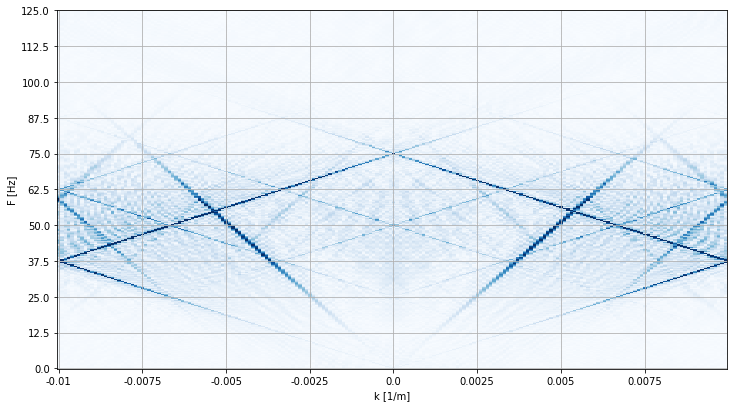

In [7]:
fig, ax = plt.subplots(figsize=(12,6.6))
ax.imshow(np.abs(data_hat.T), aspect="auto", cmap="Blues", vmin=0, vmax=255)
ax.invert_yaxis()

# format x axis
plt.xticks(ticks=k_ticks, labels=k_labels)
plt.xlabel("k [1/m]")

# format y axis
plt.yticks(ticks=F_ticks, labels=F_labels)
plt.ylabel("F [Hz]")

plt.grid()
plt.show()